In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [34]:
df = pd.read_csv('C:/Users/Dain/Python_Jupyter/데이터마이닝_홍정식/heart_failure.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [35]:
# 요약통계량
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [37]:
df.shape

(918, 12)

In [38]:
target_name = 'HeartDisease'

# 결측치 처리하기

In [39]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

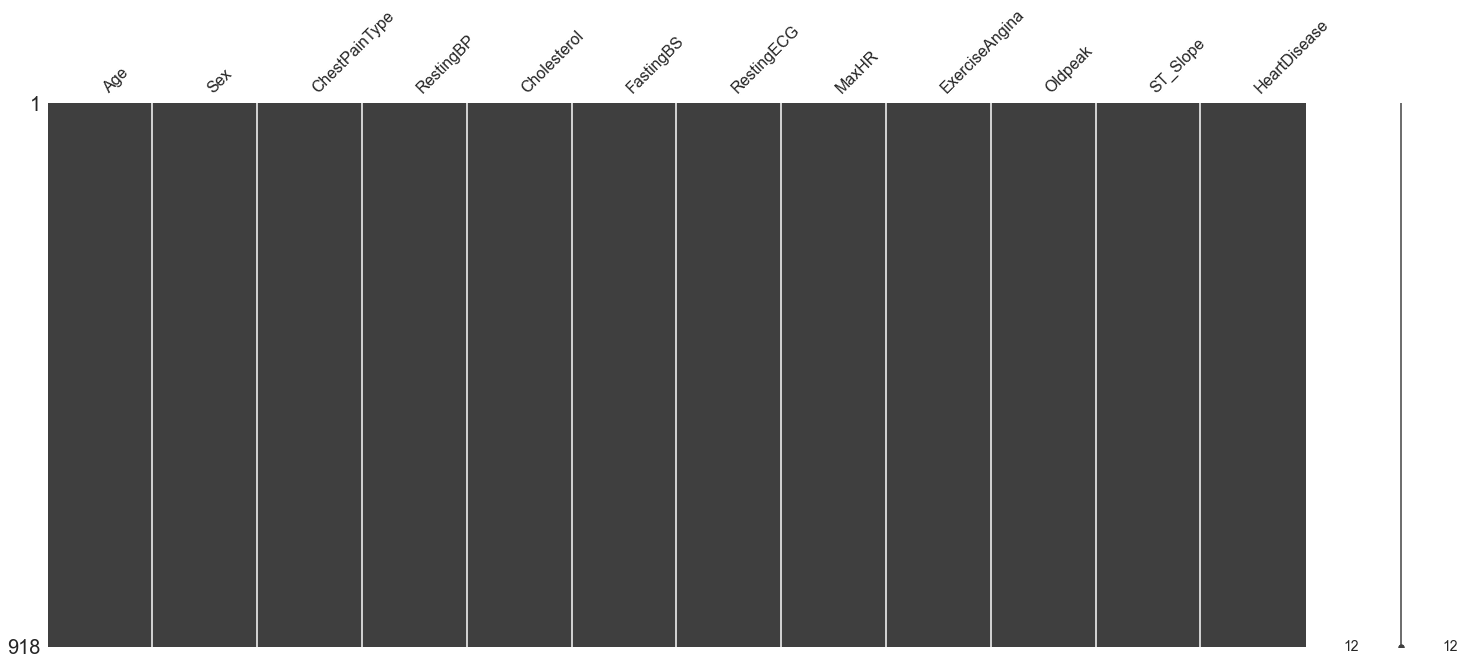

In [40]:
# 결측치 시각화
import missingno as msno
msno.matrix(df)
plt.show()

* 결측치가 있으면 그림에서 하얗게 나오는데, 하얀 부분이 없으므로 결측치는 존재하지 않는다.

# 설명변수

### 범주형 변수
+ Sex : M = male, F = female
+ ChestPainType : TA(전형적 흉통), ATA(비정형적 흉통), NAP(비협심증 통증), ASY(무증상)
+ FastingBS : fasting blood sugar, 공복혈당 (1 = if FastingBS > 120mg/dl, 0 = otherwise)
+ RestingECG : resting electocardiogram, 심전도 ; Normal, ST, LVH
+ ExerciseAngina : 활동으로 인한 협심증 여부 ; Y = yes, N = no
+ ST_Slope : ST 분절 피크의 기울기 ; UP, Flat, Down

## 수치형 변수
+ Age : 나이
+ RestingBP : resting blood pressure [mm Hg] (이완기)혈압
+ Cholesterol : 콜레스테롤
+ MaxHR : maximum heart rate achieved, 최대심박수 (60 ~ 202)
+ Oldpeak : ST (Numeric value measured in depression)

## histogram

In [41]:
sns.set_style("darkgrid")

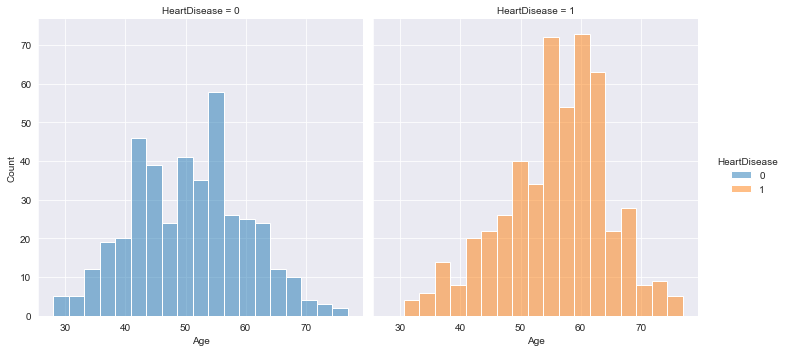

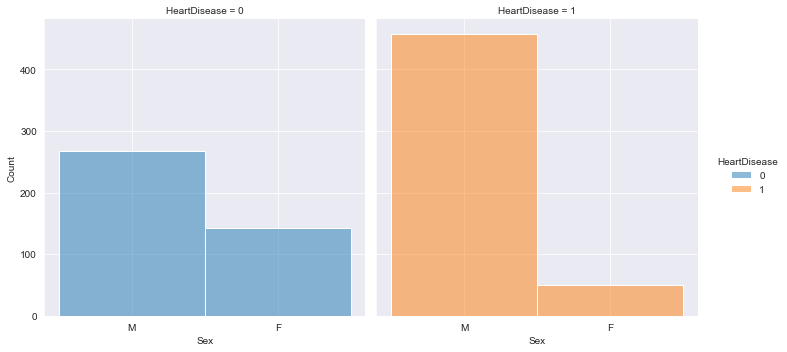

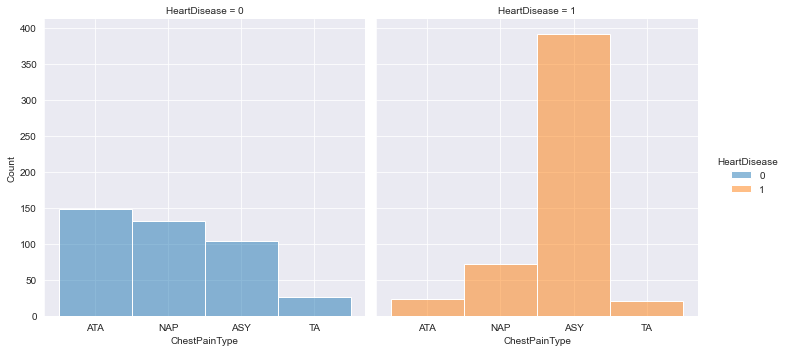

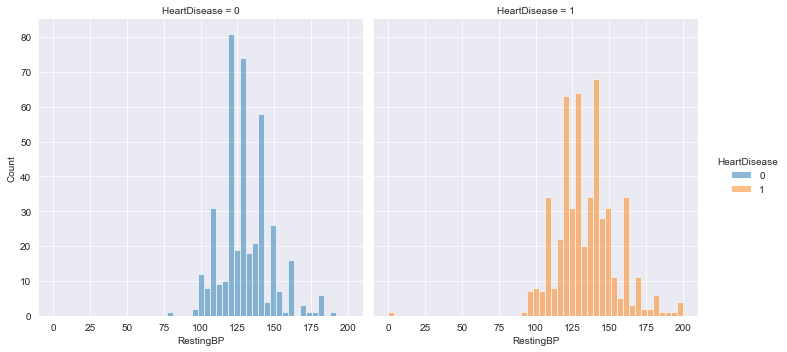

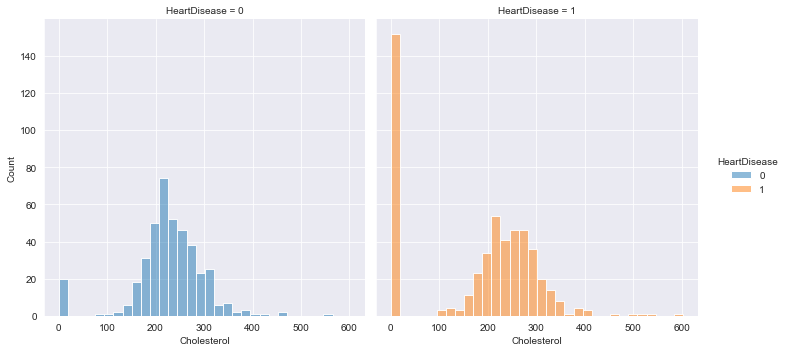

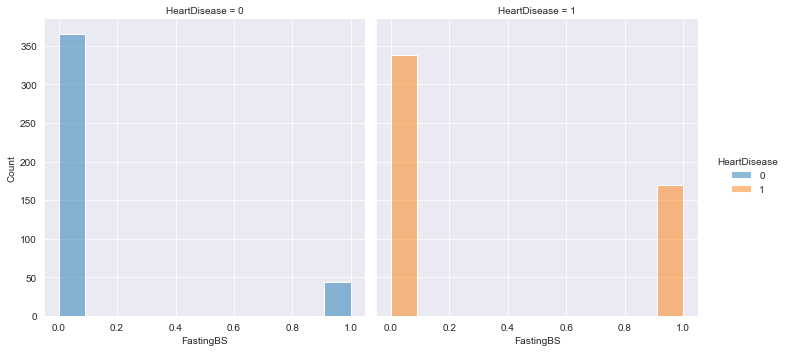

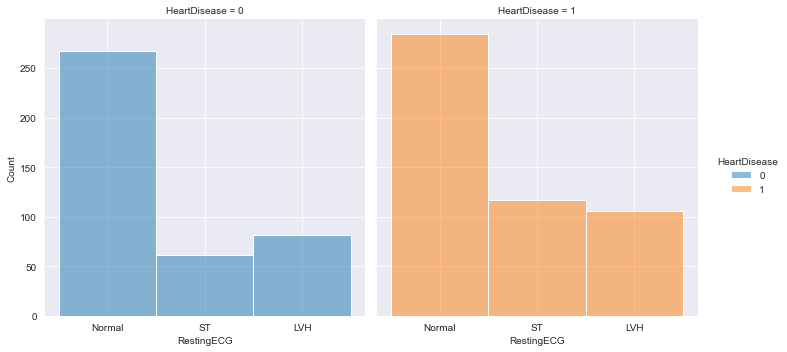

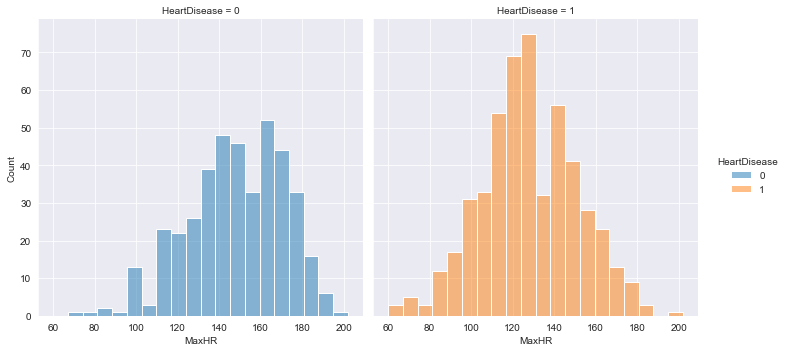

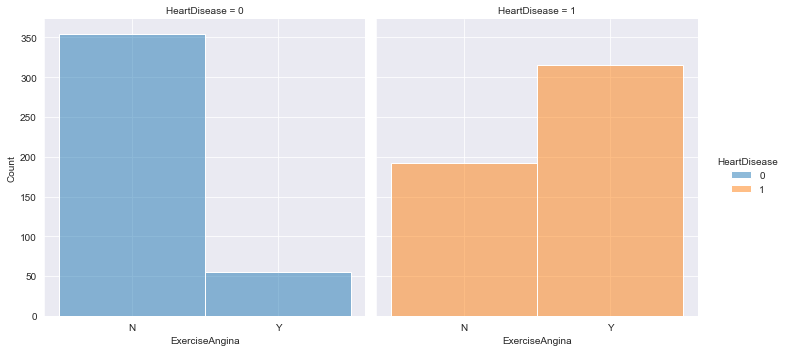

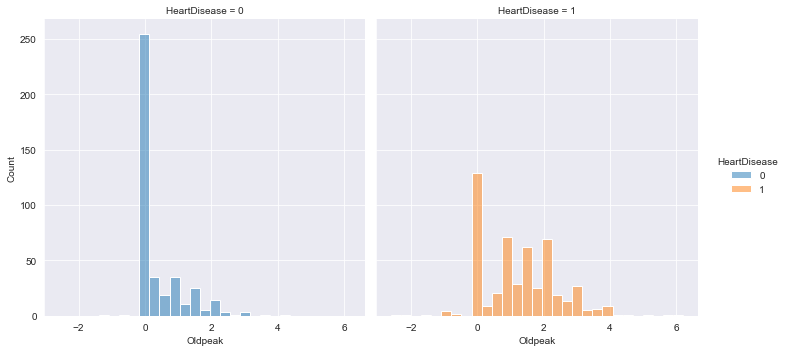

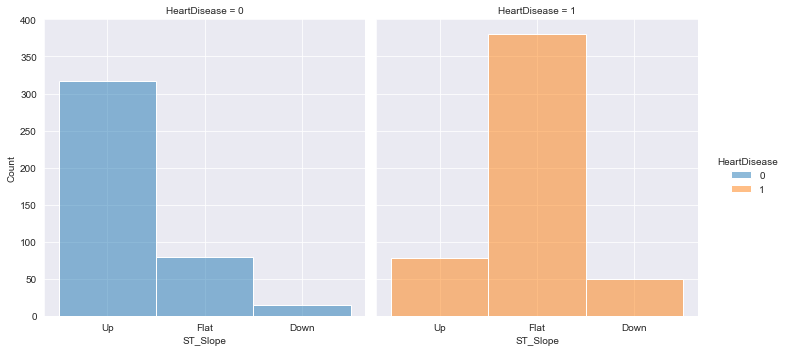

In [42]:
x_list = ["Age", "Sex", "ChestPainType", "RestingBP", "Cholesterol", "FastingBS", "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope"]
for i in x_list:
    sns.displot(data=df, x=i, hue="HeartDisease", col="HeartDisease")
    plt.show()

### 범주형 변수 pie chart

In [43]:
def pie_charts(data, x, target_name):
    colors = ['lightskyblue','lightsalmon']
    fig,axes = plt.subplots(1,2,figsize=(12,8))
    labels = df[x].unique()
    textprops = {"fontsize":15}

    axes[0].pie(df[df[target_name]==0][x].value_counts(),colors=colors, labels=labels,autopct='%1.1f%%',textprops =textprops,
               wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
    axes[0].set_title('No {}'.format(target_name),fontsize=15)
    axes[1].pie(df[df[target_name]==1][x].value_counts(),colors=colors, labels=labels,autopct='%1.1f%%',textprops =textprops,
               wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
    axes[1].set_title('Yes {}'.format(target_name),fontsize=15)

    plt.legend(title = feature, fontsize=15, title_fontsize=15, bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

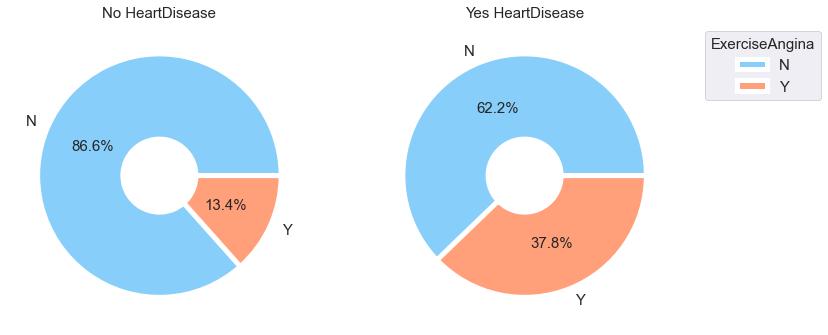

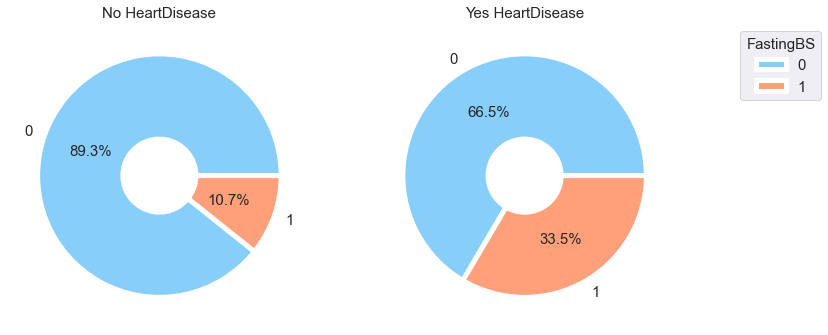

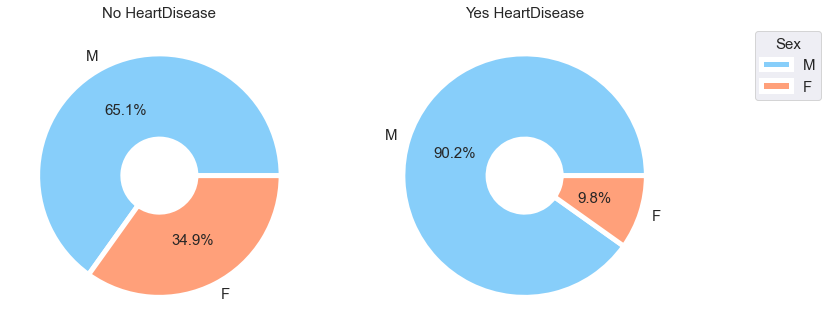

In [44]:
binary_feature = ["ExerciseAngina", "FastingBS", "Sex"]
for feature in binary_feature:
    pie_charts(df,feature,"HeartDisease")

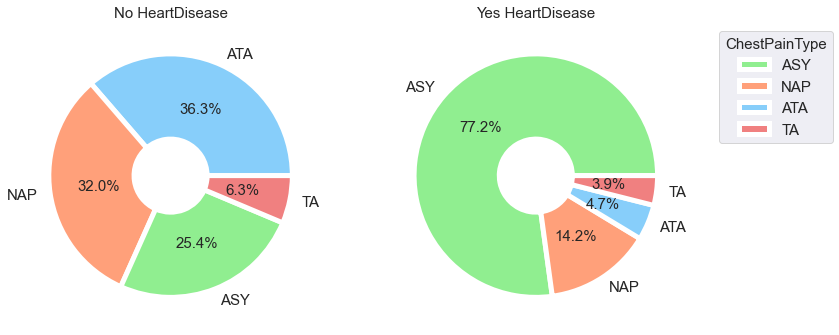

In [45]:
fig,axes = plt.subplots(1,2,figsize=(12,8))

textprops = {"fontsize":15}

axes[0].pie(df[df[target_name]==0]['ChestPainType'].value_counts(), colors = ['lightskyblue','lightsalmon','lightgreen','lightcoral'],labels=['ATA','NAP','ASY','TA'],autopct='%1.1f%%',textprops =textprops,
               wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
axes[0].set_title('No {}'.format(target_name),fontsize=15)
axes[1].pie(df[df[target_name]==1]['ChestPainType'].value_counts(), colors = ['lightgreen','lightsalmon','lightskyblue','lightcoral'], labels=['ASY', 'NAP','ATA','TA'],autopct='%1.1f%%',textprops =textprops,
               wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
axes[1].set_title('Yes {}'.format(target_name),fontsize=15)

plt.legend(title = 'ChestPainType', fontsize=15, title_fontsize=15, bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

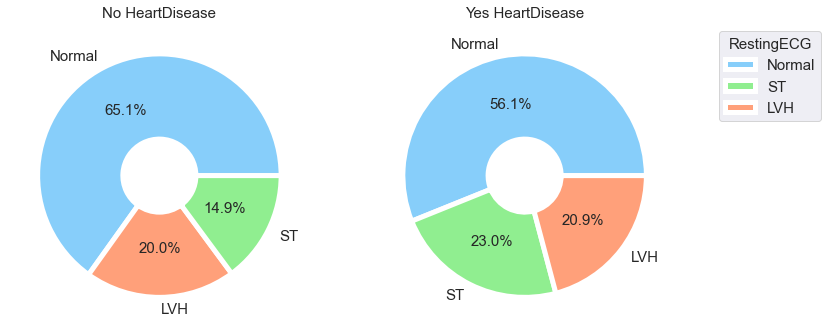

In [46]:
fig,axes = plt.subplots(1,2,figsize=(12,8))

textprops = {"fontsize":15}

axes[0].pie(df[df[target_name]==0]['RestingECG'].value_counts(), colors = ['lightskyblue','lightsalmon','lightgreen'], labels=['Normal','LVH','ST'],autopct='%1.1f%%',textprops =textprops,
               wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
axes[0].set_title('No {}'.format(target_name),fontsize=15)
axes[1].pie(df[df[target_name]==1]['RestingECG'].value_counts(), colors = ['lightskyblue','lightgreen', 'lightsalmon'], labels=['Normal', 'ST','LVH'],autopct='%1.1f%%',textprops =textprops,
               wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
axes[1].set_title('Yes {}'.format(target_name),fontsize=15)

plt.legend(title = 'RestingECG', fontsize=15, title_fontsize=15, bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

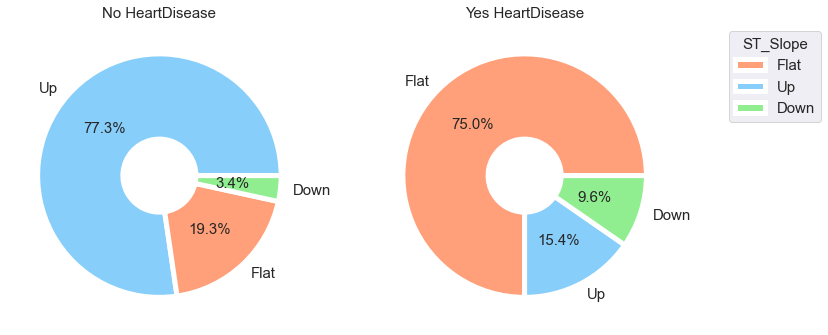

In [47]:
fig,axes = plt.subplots(1,2,figsize=(12,8))

textprops = {"fontsize":15}

axes[0].pie(df[df[target_name]==0]['ST_Slope'].value_counts(), colors = ['lightskyblue','lightsalmon','lightgreen'], labels=['Up','Flat','Down'],autopct='%1.1f%%',textprops =textprops,
               wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
axes[0].set_title('No {}'.format(target_name),fontsize=15)
axes[1].pie(df[df[target_name]==1]['ST_Slope'].value_counts(), colors = ['lightsalmon','lightskyblue','lightgreen'], labels=['Flat','Up','Down'],autopct='%1.1f%%',textprops =textprops,
               wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
axes[1].set_title('Yes {}'.format(target_name),fontsize=15)

plt.legend(title = 'ST_Slope', fontsize=15, title_fontsize=15, bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### 이상치 제거
* 콜레스테롤과 이완기 혈압에 이상치 존재 (분포에 보면 0값을 갖는것이 있음)
* 제거할 필요가 있음

In [48]:
df[df['RestingBP'] < 50]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [49]:
df[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [50]:
# 이상치 제거하기
df = df[df.RestingBP > 50]
df = df[df.Cholesterol != 0]

In [51]:
# 이상치 제거한거 확인 (총 918개 -> 746개)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## correlation

In [52]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.259865,0.058758,0.241338,-0.382112,0.286006,0.298617
RestingBP,0.259865,1.000000,0.095939,0.173765,-0.125774,0.198575,0.173242
Cholesterol,0.058758,0.095939,1.000000,0.054012,-0.019856,0.058488,0.103866
FastingBS,0.241338,0.173765,0.054012,1.000000,-0.102710,0.055568,0.160594
MaxHR,-0.382112,-0.125774,-0.019856,-0.102710,1.000000,-0.259533,-0.377212
Oldpeak,0.286006,0.198575,0.058488,0.055568,-0.259533,1.000000,0.495696
HeartDisease,0.298617,0.173242,0.103866,0.160594,-0.377212,0.495696,1.000000


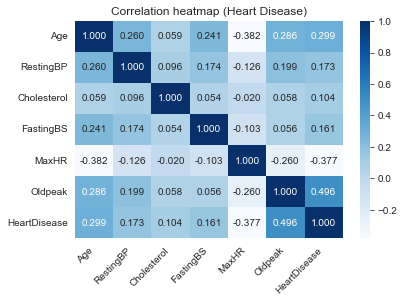

In [53]:
# 수치형 변수 heatmap
hm = sns.heatmap(df.corr(), annot = True, cmap='Blues', fmt = '.3f')
hm.set_xticklabels(hm.get_xticklabels(), rotation=45, horizontalalignment='right')
hm.set_title('Correlation heatmap (Heart Disease)')
plt.show()

## Scatter Plot
* scatter plot에 범주형 변수도 포함하기 위해 label encoding을 수행한다.

In [54]:
from sklearn import preprocessing
df_scatter = pd.read_csv('C:/Users/Dain/Python_Jupyter/데이터마이닝_홍정식/heart_failure.csv')

In [55]:
# label encoding
le = preprocessing.LabelEncoder()
df_scatter['Sex'] = le.fit_transform(df_scatter['Sex'])
df_scatter['ChestPainType'] = le.fit_transform(df_scatter['ChestPainType'])
df_scatter['RestingECG'] = le.fit_transform(df_scatter['RestingECG'])
df_scatter['ExerciseAngina'] = le.fit_transform(df_scatter['ExerciseAngina'])
df_scatter['ST_Slope'] = le.fit_transform(df_scatter['ST_Slope'])

In [57]:
df_scatter

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


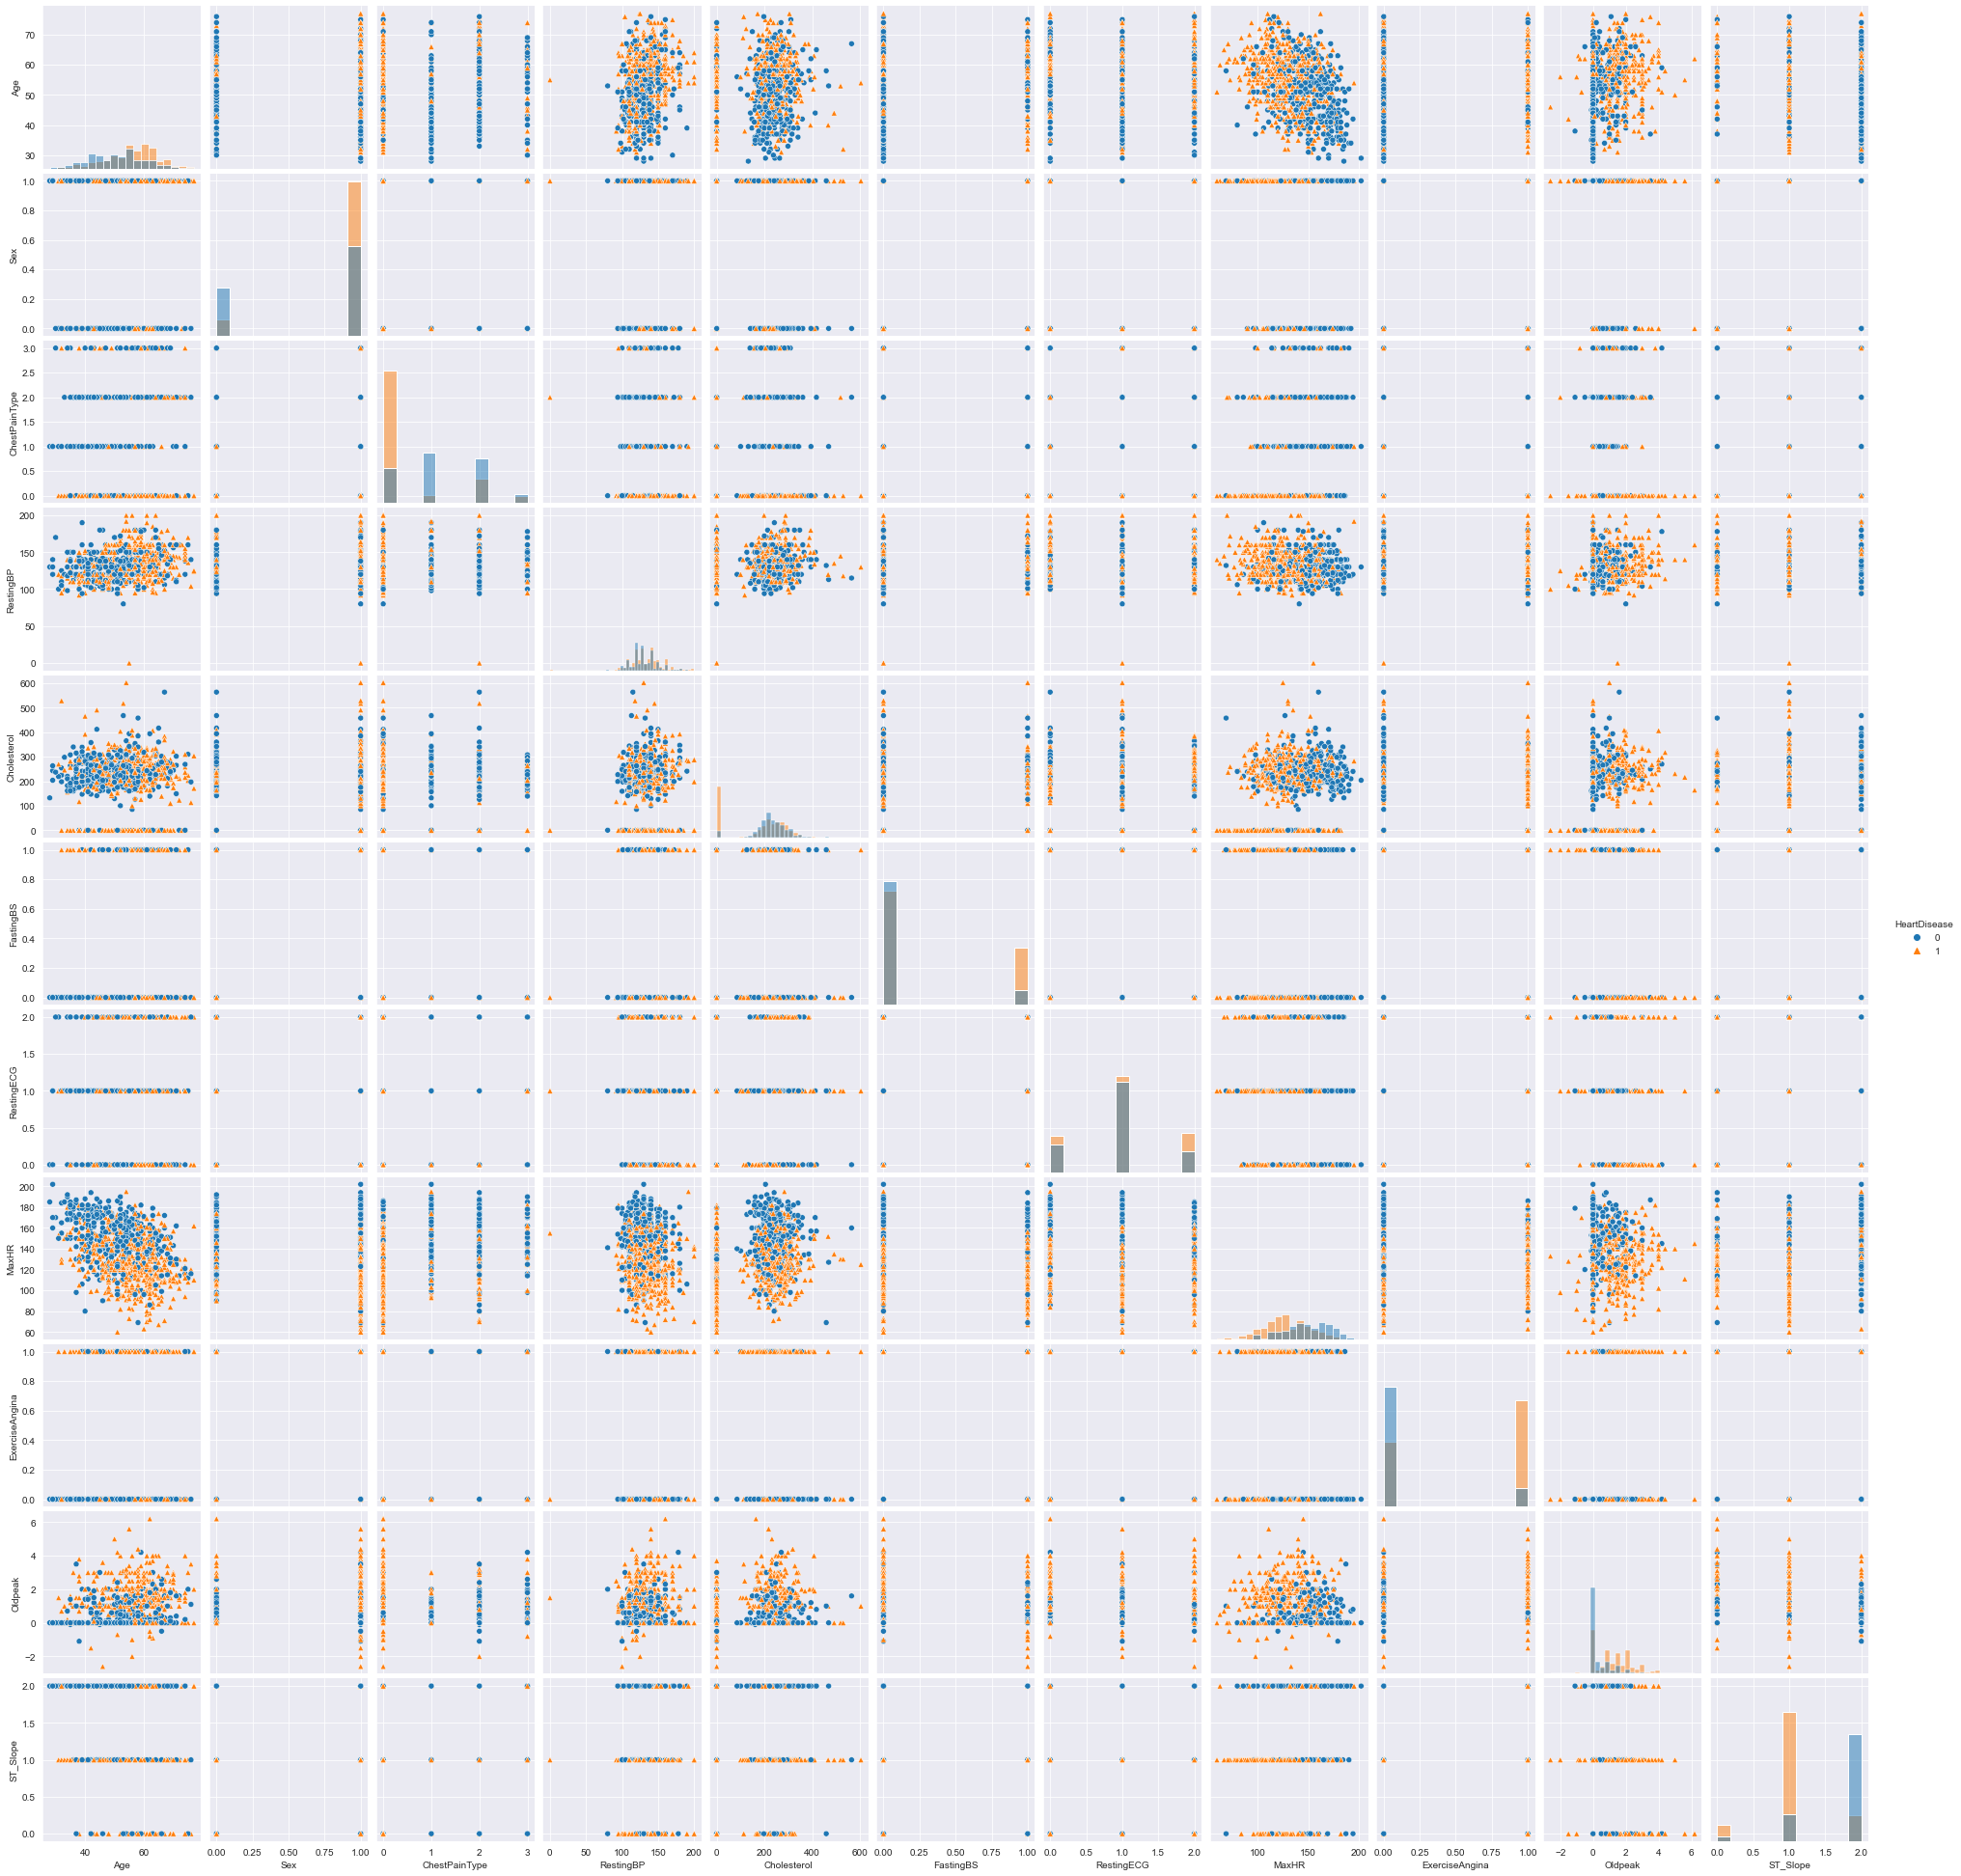

In [58]:
sns.pairplot(df_scatter, hue = 'HeartDisease', diag_kind = 'hist', markers=["o", "^"])
plt.show()

## Homogeneity & Coverage

In [59]:
def _coverage(subset,n):
    return subset.shape[0]/n
def _homogeneity(y):
    _, counts = np.unique(y, return_counts=True)
    ps = counts / len(y)
    return max(ps)
def coverHomo(dataset, target_name, col, operator):         
    coverage = []
    homogeneity = []
    unique_values = np.unique(dataset[col])
    ops = {"<=": (lambda x,y: x<=y), ">=": (lambda x,y: x>=y)}
    for cut_point in unique_values:
        subset = dataset[ops[operator] (dataset[col],cut_point)]
        coverage.append(_coverage(subset[target_name], dataset.shape[0]))
        homogeneity.append(_homogeneity(subset[target_name]))
    return coverage, homogeneity, unique_values

In [62]:
num_col = df.drop(columns=['HeartDisease', 'FastingBS']).select_dtypes(include=['number']).columns.tolist()
print('numeric:',num_col)

numeric: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


In [63]:
# 사전확률 함수
def pre_p(df, target_name, col, y):
    df_sub = df.loc[df[target_name] == y, [col]]
    #df_sub1 = df.loc[df[target_name] == 1, [col]]
    
    total = 746
    p = [len(df_sub)/total]
    #p1 = [len(df_sub1)/total]
    return p

In [64]:
# weighted accuracy
def wa(col, y):
    if y==0:
        cover, homo, cut_points = coverHomo(df, target_name, col, '<=')
        cover = np.array(cover)
        homo = np.array(homo)
        p = np.array(pre_p(df, target_name, col, 0)*len(homo))
        wa = cover * (homo - p)
        return wa.tolist()
    
    elif y==1:
        cover, homo, cut_points = coverHomo(df, target_name, col, '>=')
        cover = np.array(cover)
        homo = np.array(homo)
        p = np.array(pre_p(df, target_name, col, 1)*len(homo))
        wa = cover * (homo - p)
        return wa.tolist()
    

### 수치형 변수 coverage, homogeneity, WA

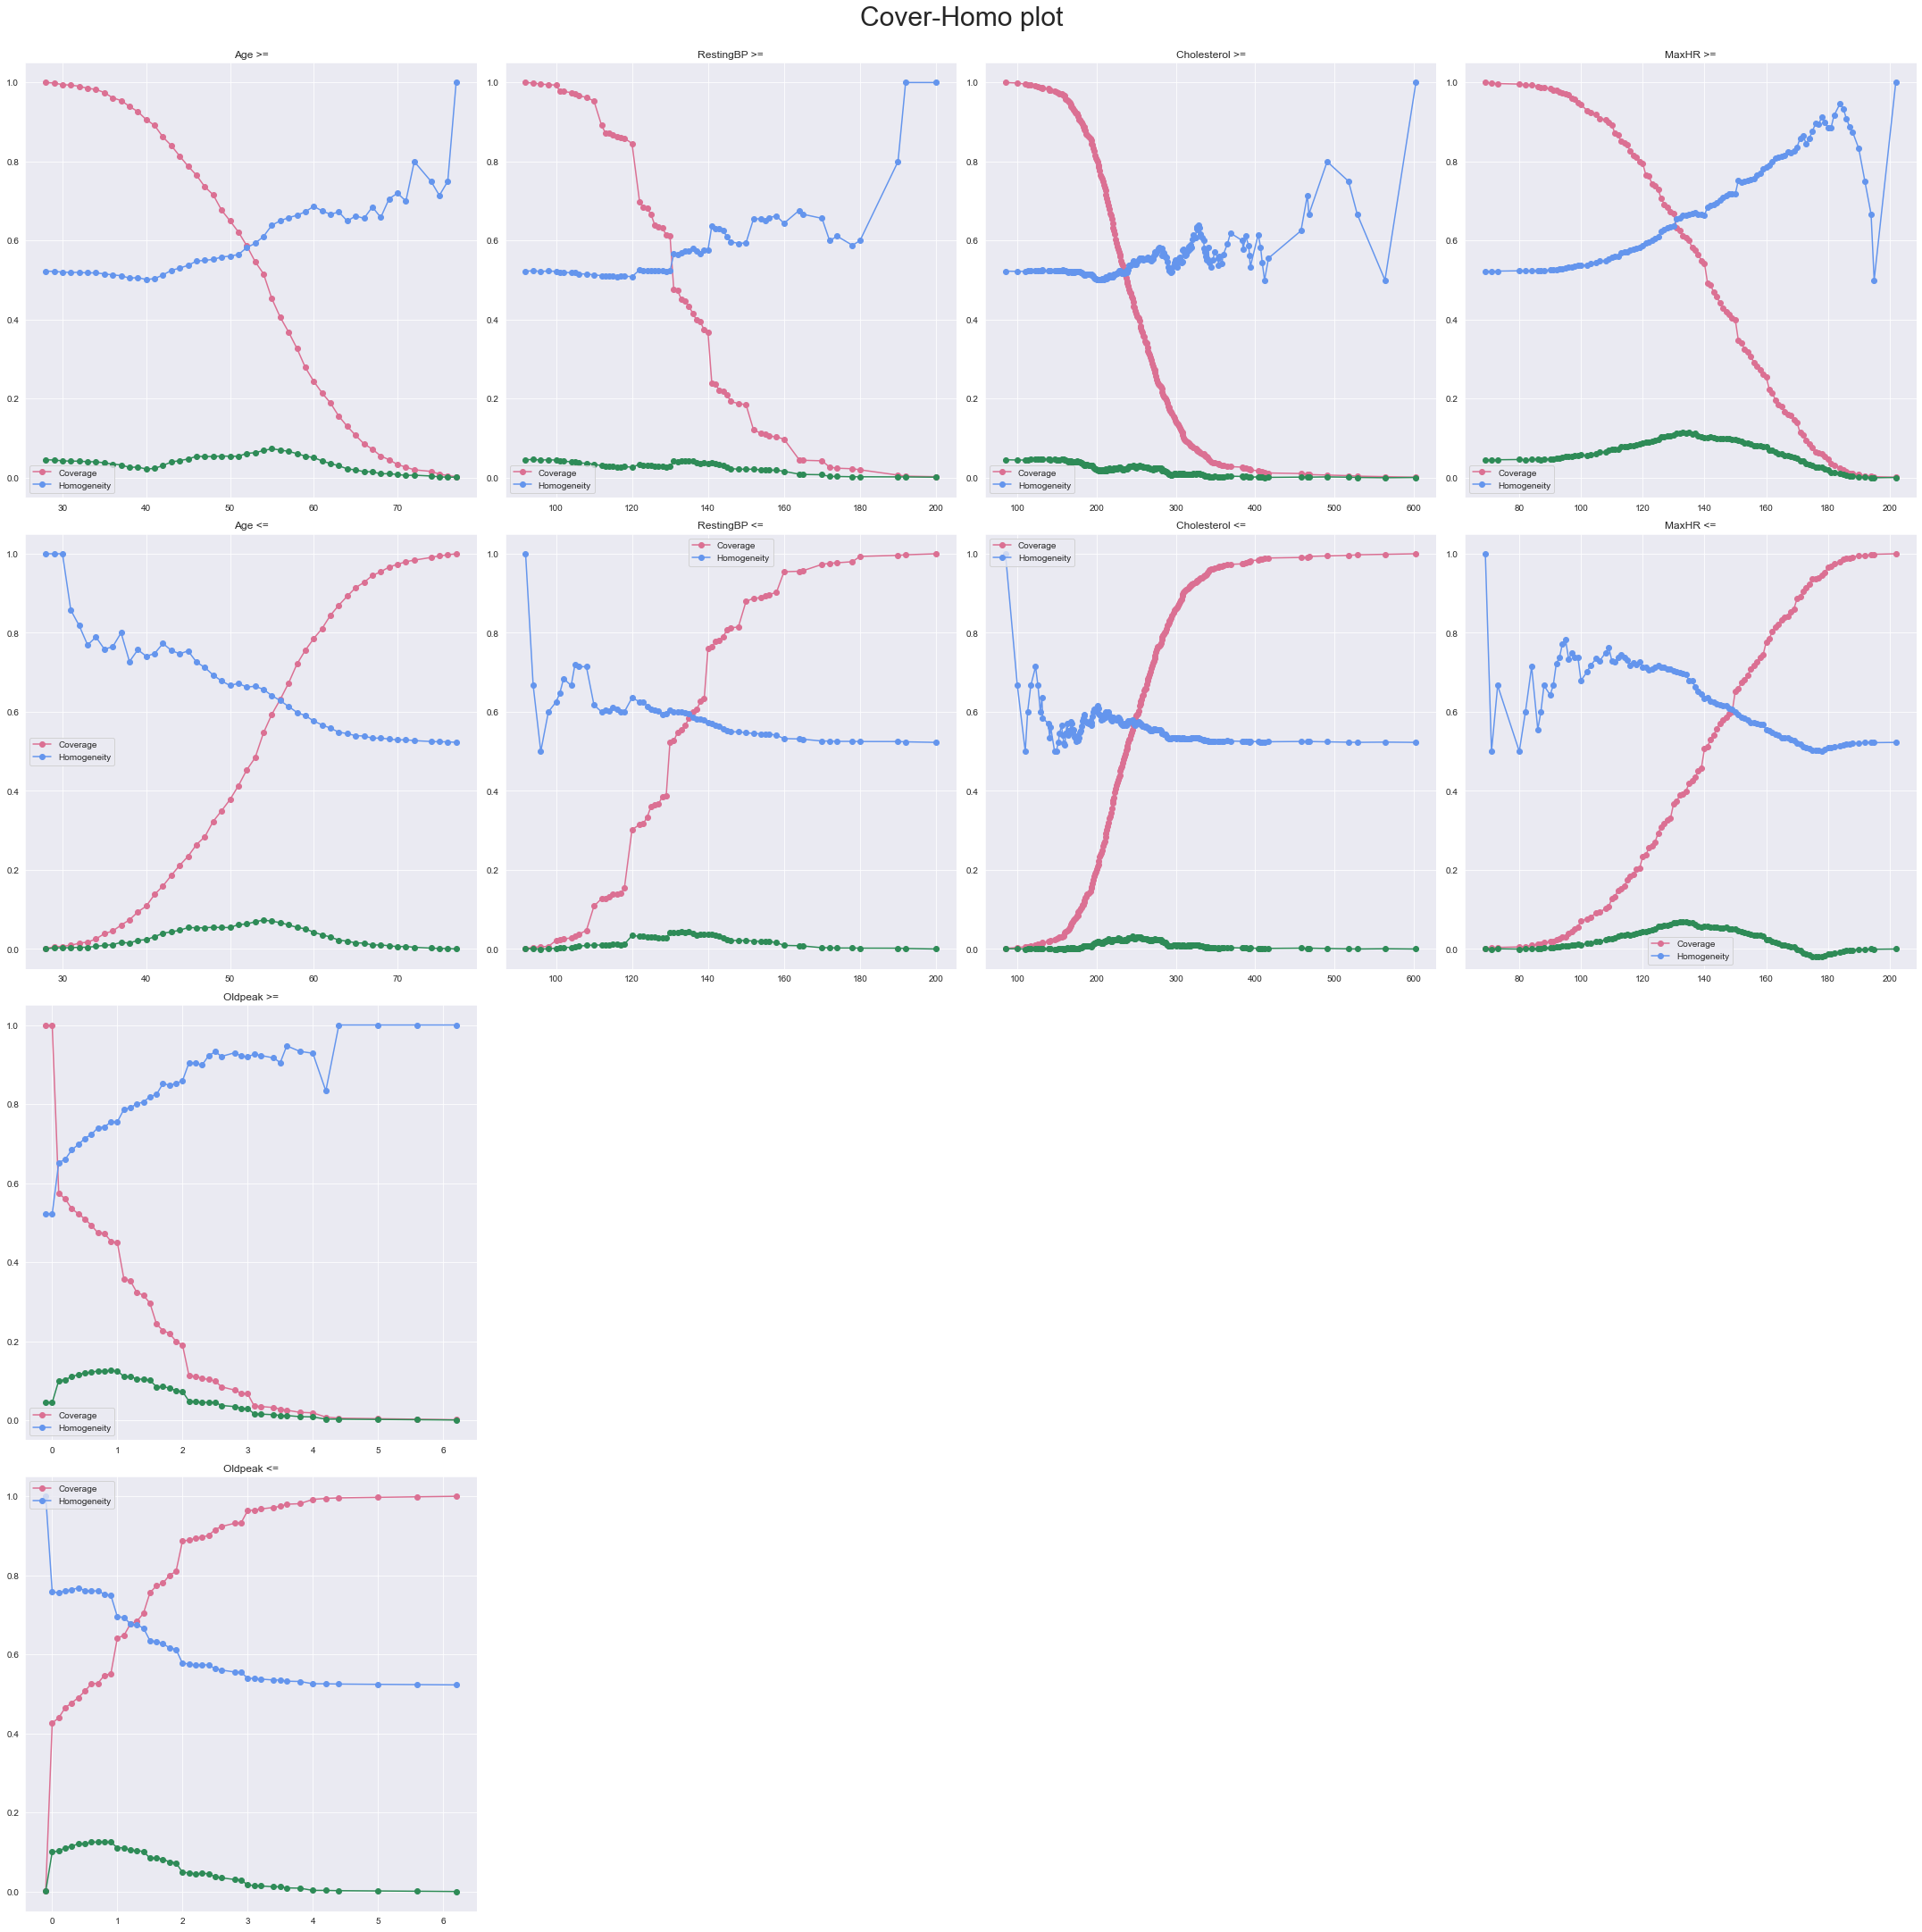

In [65]:
ncols = 4
nrows = len(num_col) // ncols + (len(num_col) % ncols > 0)
n=1
i=0

plt.figure(figsize=(30, 30)) 
for col in num_col[:]:
    ax1 = plt.subplot(nrows*2, ncols, n+i)
    cover, homo, cut_points = coverHomo(df, target_name, col, '>=')
    ax1.plot(cut_points,cover,'-o', color='palevioletred')
    ax1.plot(cut_points,homo,'-o', color='cornflowerblue')
    ax1.plot(cut_points,wa(col, 1),'-o', color='seagreen')
    ax1.set_title(col +' >=')
    ax1.legend(['Coverage','Homogeneity'])
    ax1.set_ylim(-0.05,1.05)
    
    ax2 = plt.subplot(nrows*2, ncols, n+i+ncols)
    cover, homo, cut_points = coverHomo(df, target_name, col, '<=')
    ax2.plot(cut_points,cover,'-o', color='palevioletred')
    ax2.plot(cut_points,homo,'-o', color='cornflowerblue')
    ax2.plot(cut_points,wa(col, 0), '-o', color='seagreen')
    ax2.set_title(col +' <=')
    ax2.legend(['Coverage','Homogeneity'])
    ax2.set_ylim(-0.05,1.05)
    if n % (ncols) == 0 : i+=ncols
    n+=1

plt.suptitle("Cover-Homo plot", fontsize=30, y=1)
plt.savefig('coverHomo.png', dpi=300, transparent=True) # save figure (dpi=300, transparent=True)
plt.tight_layout()
plt.show()

In [66]:
# weighted acc가 가장 높은 지점 확인해보기
for i in num_col:
    print('-------------- {} -----------------'.format(i))

    print('Weighted Accuracy : ', max(wa(i, 1)))
    print()

    print('Weighted Accuracy : ', max(wa(i, 0)))
    print()

-------------- Age -----------------
Weighted Accuracy :  0.07332763119119669

Weighted Accuracy :  0.07332763119119666

-------------- RestingBP -----------------
Weighted Accuracy :  0.046216101603547825

Weighted Accuracy :  0.04301403733226001

-------------- Cholesterol -----------------
Weighted Accuracy :  0.04737330103716697

Weighted Accuracy :  0.031589388265566495

-------------- MaxHR -----------------
Weighted Accuracy :  0.11446571167765168

Weighted Accuracy :  0.06888930417094924

-------------- Oldpeak -----------------
Weighted Accuracy :  0.12560645156653177

Weighted Accuracy :  0.12560645156653177



### 범주형 변수 coverage, homogeneity, WA

In [68]:
# 사전확률
total = 746
p0 = (df.loc[df[target_name] == 0, ].shape[0])/total
p1 = (df.loc[df[target_name] == 1, ].shape[0])/total
print(p0, p1)

0.5227882037533512 0.4772117962466488


### Sex

In [69]:
# coverage
r1 = df.loc[df['Sex'] == 'F', ].shape[0]
r2 = df.loc[df['Sex'] == 'M', ].shape[0]
total = 746
cover_f = r1/total
cover_m = r2/total

In [70]:
# homogeneity
r1_0 = df.loc[(df['Sex'] == 'F') & (df[target_name] == 0), ].shape[0]
r1_1 = df.loc[(df['Sex'] == 'F') & (df[target_name] == 1), ].shape[0]
r2_0 = df.loc[(df['Sex'] == 'M') & (df[target_name] == 0), ].shape[0]
r2_1 = df.loc[(df['Sex'] == 'M') & (df[target_name] == 1), ].shape[0]
homo_f_0 = r1_0/r1
homo_f_1 = r1_1/r1
homo_m_0 = r2_0/r2
homo_m_1 = r2_1/r2

In [71]:
# weighted acc
wa_f_0 = cover_f * (homo_f_0 - p0)
wa_f_1 = cover_f * (homo_f_1 - p1)
wa_m_0 = cover_m * (homo_m_0 - p0)
wa_m_1 = cover_m * (homo_m_1 - p1)

In [72]:
print(cover_f, cover_m)
print(homo_f_0, homo_f_1)
print(homo_m_0, homo_m_1)
print(wa_f_0, wa_f_1, wa_m_0, wa_m_1)

0.24396782841823056 0.7560321715817694
0.7802197802197802 0.21978021978021978
0.4397163120567376 0.5602836879432624
0.06280502267679636 -0.06280502267679636 -0.06280502267679634 0.06280502267679638


### ChestPainType

In [73]:
#coverage
r1 = df.loc[df['ChestPainType'] == 'ASY', ].shape[0]
r2 = df.loc[df['ChestPainType'] == 'ATA', ].shape[0]
r3 = df.loc[df['ChestPainType'] == 'NAP', ].shape[0]
r4 = df.loc[df['ChestPainType'] == 'TA', ].shape[0]
total = 746
cover_asy = r1/total
cover_ata = r2/total
cover_nap = r3/total
cover_ta = r4/total

#homogeneity
r1_0 = df.loc[(df['ChestPainType'] == 'ASY') & (df[target_name] == 0), ].shape[0]
r1_1 = df.loc[(df['ChestPainType'] == 'ASY') & (df[target_name] == 1), ].shape[0]
r2_0 = df.loc[(df['ChestPainType'] == 'ATA') & (df[target_name] == 0), ].shape[0]
r2_1 = df.loc[(df['ChestPainType'] == 'ATA') & (df[target_name] == 1), ].shape[0]
r3_0 = df.loc[(df['ChestPainType'] == 'NAP') & (df[target_name] == 0), ].shape[0]
r3_1 = df.loc[(df['ChestPainType'] == 'NAP') & (df[target_name] == 1), ].shape[0]
r4_0 = df.loc[(df['ChestPainType'] == 'TA') & (df[target_name] == 0), ].shape[0]
r4_1 = df.loc[(df['ChestPainType'] == 'TA') & (df[target_name] == 1), ].shape[0]
homo_asy_0 = r1_0/r1
homo_asy_1 = r1_1/r1
homo_ata_0 = r2_0/r2
homo_ata_1 = r2_1/r2
homo_nap_0 = r3_0/r3
homo_nap_1 = r3_1/r3
homo_ta_0 = r4_0/r4
homo_ta_1 = r4_1/r4

# weighted acc
wa_asy_0 = cover_asy * (homo_asy_0 - p0)
wa_asy_1 = cover_asy * (homo_asy_1 - p1)
wa_ata_0 = cover_ata * (homo_ata_0 - p0)
wa_ata_1 = cover_ata * (homo_ata_1 - p1)
wa_nap_0 = cover_nap * (homo_nap_0 - p0)
wa_nap_1 = cover_nap * (homo_nap_1 - p1)
wa_ta_0 = cover_ta * (homo_ta_0 - p0)
wa_ta_1 = cover_ta * (homo_ta_1 - p1)

In [74]:
print(cover_asy, cover_ata, cover_nap, cover_ta)
print(homo_asy_0, homo_asy_1)
print(homo_ata_0, homo_ata_1)
print(homo_nap_0, homo_nap_1)
print(homo_ta_0, homo_ta_1)
print(wa_asy_0, wa_asy_1)
print(wa_ata_0, wa_ata_1)
print(wa_nap_0, wa_nap_1)
print(wa_ta_0, wa_ta_1)

0.4959785522788204 0.2225201072386059 0.22654155495978553 0.054959785522788206
0.2594594594594595 0.7405405405405405
0.8734939759036144 0.12650602409638553
0.727810650887574 0.27218934911242604
0.6341463414634146 0.36585365853658536
-0.1306054093682841 0.1306054093682841
0.07803908602807466 -0.07803908602807466
0.04644610397544726 -0.046446103975447246
0.006120219364762199 -0.006120219364762199


### RestingECG

In [75]:
#coverage
r1 = df.loc[df['RestingECG'] == 'LVH', ].shape[0]
r2 = df.loc[df['RestingECG'] == 'Normal', ].shape[0]
r3 = df.loc[df['RestingECG'] == 'ST', ].shape[0]

total = 746
cover_lvh = r1/total
cover_n = r2/total
cover_st = r3/total


#homogeneity
r1_0 = df.loc[(df['RestingECG'] == 'LVH') & (df[target_name] == 0), ].shape[0]
r1_1 = df.loc[(df['RestingECG'] == 'LVH') & (df[target_name] == 1), ].shape[0]
r2_0 = df.loc[(df['RestingECG'] == 'Normal') & (df[target_name] == 0), ].shape[0]
r2_1 = df.loc[(df['RestingECG'] == 'Normal') & (df[target_name] == 1), ].shape[0]
r3_0 = df.loc[(df['RestingECG'] == 'ST') & (df[target_name] == 0), ].shape[0]
r3_1 = df.loc[(df['RestingECG'] == 'ST') & (df[target_name] == 1), ].shape[0]

homo_lvh_0 = r1_0/r1
homo_lvh_1 = r1_1/r1
homo_n_0 = r2_0/r2
homo_n_1 = r2_1/r2
homo_st_0 = r3_0/r3
homo_st_1 = r3_1/r3

# weighted acc
wa_lvh_0 = cover_lvh * (homo_lvh_0 - p0)
wa_lvh_1 = cover_lvh * (homo_lvh_1 - p1)
wa_n_0 = cover_n * (homo_n_0 - p0)
wa_n_1 = cover_n * (homo_n_1 - p1)
wa_st_0 = cover_st * (homo_st_0 - p0)
wa_st_1 = cover_st * (homo_st_1 - p1)

In [76]:
print(cover_lvh, cover_n, cover_st)
print(homo_lvh_0, homo_lvh_1)
print(homo_n_0, homo_n_1)
print(homo_st_0, homo_st_1)
print(wa_lvh_0, wa_lvh_1)
print(wa_n_0, wa_n_1)
print(wa_st_0, wa_st_1)

0.2359249329758713 0.596514745308311 0.1675603217158177
0.4602272727272727 0.5397727272727273
0.5775280898876405 0.42247191011235957
0.416 0.584
-0.014759683459235682 0.014759683459235682
0.0326531492356015 -0.03265314923560147
-0.017893465776365823 0.017893465776365816


### ExerciseAngina

In [77]:
# coverage
r1 = df.loc[df['ExerciseAngina'] == 'N', ].shape[0]
r2 = df.loc[df['ExerciseAngina'] == 'Y', ].shape[0]
total = 746
cover_N = r1/total
cover_Y = r2/total

# homogeneity
r1_0 = df.loc[(df['ExerciseAngina'] == 'N') & (df[target_name] == 0), ].shape[0]
r1_1 = df.loc[(df['ExerciseAngina'] == 'N') & (df[target_name] == 1), ].shape[0]
r2_0 = df.loc[(df['ExerciseAngina'] == 'Y') & (df[target_name] == 0), ].shape[0]
r2_1 = df.loc[(df['ExerciseAngina'] == 'Y') & (df[target_name] == 1), ].shape[0]
homo_N_0 = r1_0/r1
homo_N_1 = r1_1/r1
homo_Y_0 = r2_0/r2
homo_Y_1 = r2_1/r2

# weighted acc
wa_N_0 = cover_N * (homo_N_0 - p0)
wa_N_1 = cover_N * (homo_N_1 - p1)
wa_Y_0 = cover_Y * (homo_Y_0 - p0)
wa_Y_1 = cover_Y * (homo_Y_1 - p1)

In [78]:
print(cover_N, cover_Y)
print(homo_N_0, homo_N_1)
print(homo_Y_0, homo_Y_1)
print(wa_N_0, wa_N_1)
print(wa_Y_0, wa_Y_1)

0.6152815013404825 0.3847184986595174
0.7407407407407407 0.25925925925925924
0.17421602787456447 0.8257839721254355
0.13410216417856805 -0.13410216417856807
-0.13410216417856807 0.13410216417856807


### ST_Slope

In [79]:
#coverage
r1 = df.loc[df['ST_Slope'] == 'Down', ].shape[0]
r2 = df.loc[df['ST_Slope'] == 'Flat', ].shape[0]
r3 = df.loc[df['ST_Slope'] == 'Up', ].shape[0]

total = 746
cover_d = r1/total
cover_f = r2/total
cover_u = r3/total


#homogeneity
r1_0 = df.loc[(df['ST_Slope'] == 'Down') & (df[target_name] == 0), ].shape[0]
r1_1 = df.loc[(df['ST_Slope'] == 'Down') & (df[target_name] == 1), ].shape[0]
r2_0 = df.loc[(df['ST_Slope'] == 'Flat') & (df[target_name] == 0), ].shape[0]
r2_1 = df.loc[(df['ST_Slope'] == 'Flat') & (df[target_name] == 1), ].shape[0]
r3_0 = df.loc[(df['ST_Slope'] == 'Up') & (df[target_name] == 0), ].shape[0]
r3_1 = df.loc[(df['ST_Slope'] == 'Up') & (df[target_name] == 1), ].shape[0]

homo_d_0 = r1_0/r1
homo_d_1 = r1_1/r1
homo_f_0 = r2_0/r2
homo_f_1 = r2_1/r2
homo_u_0 = r3_0/r3
homo_u_1 = r3_1/r3

# weighted acc
wa_d_0 = cover_d * (homo_d_0 - p0)
wa_d_1 = cover_d * (homo_d_1 - p1)
wa_f_0 = cover_f * (homo_f_0 - p0)
wa_f_1 = cover_f * (homo_f_1 - p1)
wa_u_0 = cover_u * (homo_u_0 - p0)
wa_u_1 = cover_u * (homo_u_1 - p1)

In [80]:
print(cover_d, cover_f, cover_u)
print(homo_d_0, homo_d_1)
print(homo_f_0, homo_f_1)
print(homo_u_0, homo_u_1)
print(wa_d_0, wa_d_1)
print(wa_f_0, wa_f_1)
print(wa_u_0, wa_u_1)

0.057640750670241284 0.4745308310991957 0.467828418230563
0.2558139534883721 0.7441860465116279
0.211864406779661 0.788135593220339
0.8710601719197708 0.12893982808022922
-0.01538859619489826 0.01538859619489826
-0.14754292778644282 0.14754292778644282
0.16293152398134106 -0.16293152398134106


### FastingBS

In [81]:
# coverage
r1 = df.loc[df['FastingBS'] == 0, ].shape[0]
r2 = df.loc[df['FastingBS'] == 1, ].shape[0]
total = 746
cover_bs0 = r1/total
cover_bs1 = r2/total

# homogeneity
r1_0 = df.loc[(df['FastingBS'] == 0) & (df[target_name] == 0), ].shape[0]
r1_1 = df.loc[(df['FastingBS'] == 0) & (df[target_name] == 1), ].shape[0]
r2_0 = df.loc[(df['FastingBS'] == 1) & (df[target_name] == 0), ].shape[0]
r2_1 = df.loc[(df['FastingBS'] == 1) & (df[target_name] == 1), ].shape[0]
homo_bs0_0 = r1_0/r1
homo_bs0_1 = r1_1/r1
homo_bs1_0 = r2_0/r2
homo_bs1_1 = r2_1/r2

# weighted acc
wa_bs0_0 = cover_bs0 * (homo_bs0_0 - p0)
wa_bs0_1 = cover_bs0 * (homo_bs0_1 - p1)
wa_bs1_0 = cover_bs1 * (homo_bs1_0 - p0)
wa_bs1_1 = cover_bs1 * (homo_bs1_1 - p1)

In [82]:
print(cover_bs0, cover_bs1)
print(homo_bs0_0, homo_bs0_1)
print(homo_bs1_0, homo_bs1_1)
print(wa_bs0_0, wa_bs0_1)
print(wa_bs1_0, wa_bs1_1)

0.8324396782841823 0.1675603217158177
0.5587761674718197 0.44122383252818037
0.344 0.656
0.029957808939904712 -0.029957808939904667
-0.0299578089399047 0.0299578089399047


### weighted acc plot만 따로 그리기(수치형 변수만)

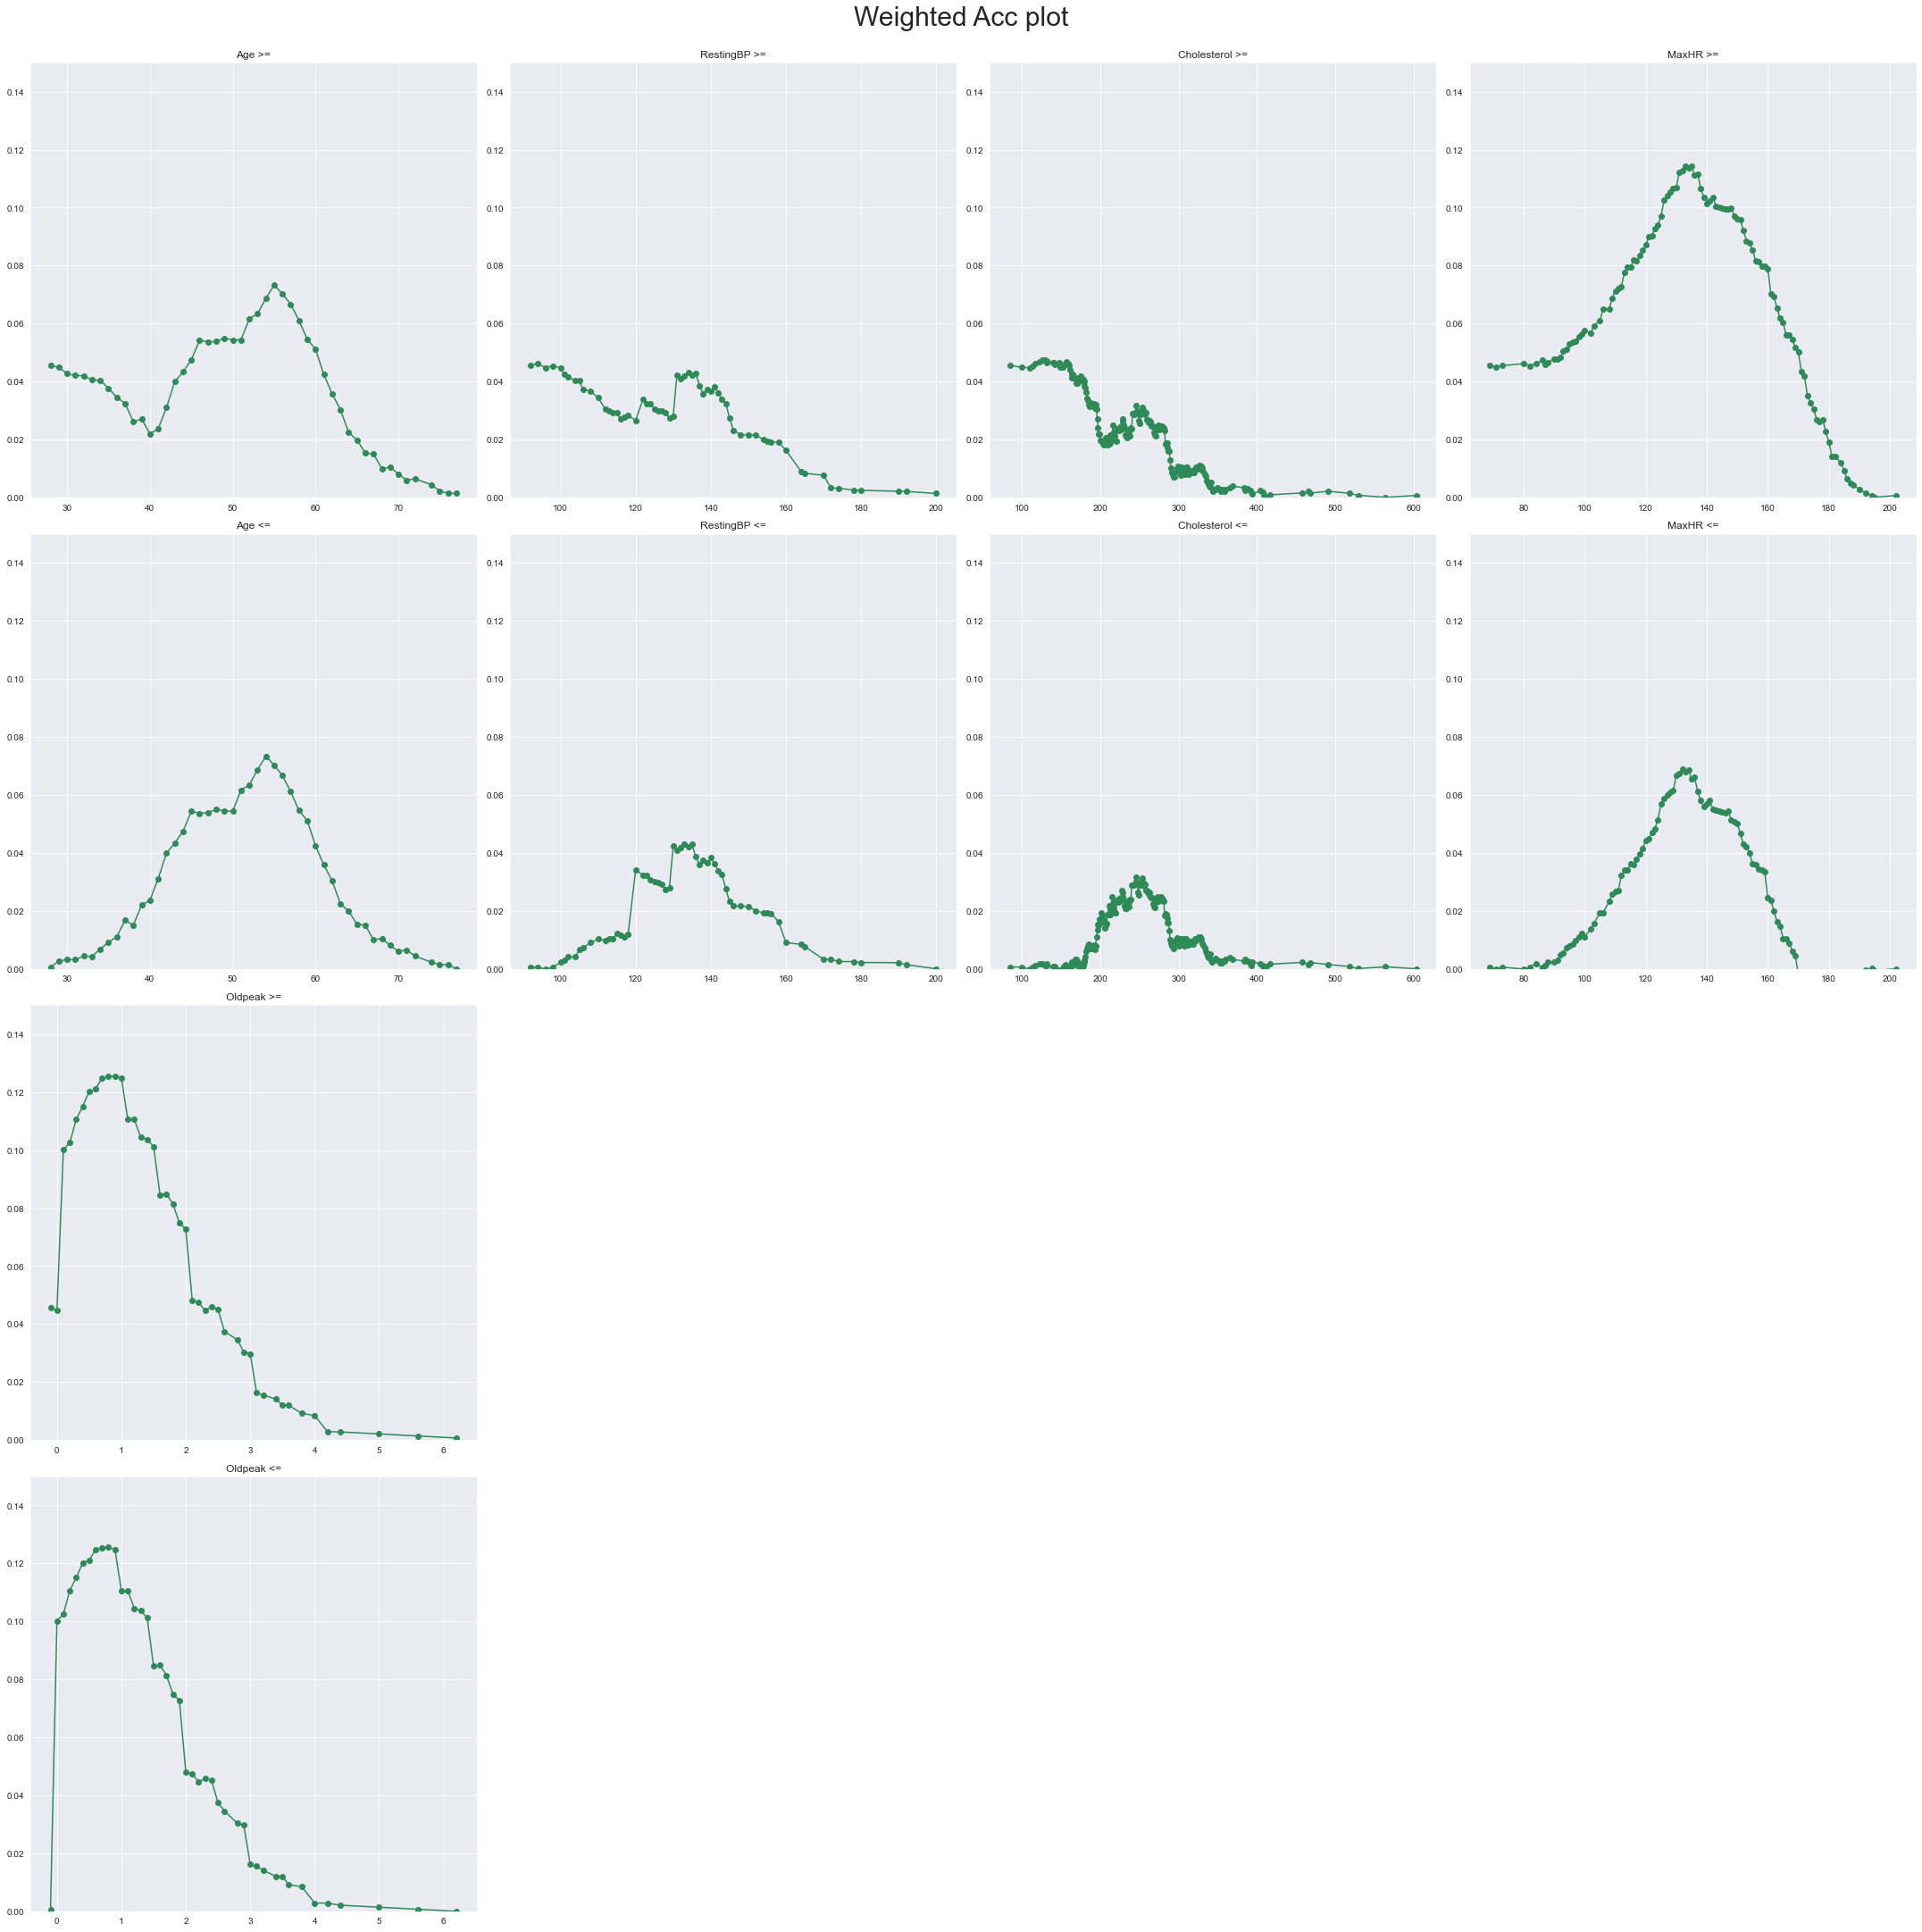

In [83]:
ncols = 4
nrows = len(num_col) // ncols + (len(num_col) % ncols > 0)
n=1
i=0

plt.figure(figsize=(30, 30)) 
for col in num_col[:]:
    ax3 = plt.subplot(nrows*2, ncols, n+i)
    cover, homo, cut_points = coverHomo(df, target_name, col, '>=')
    ax3.plot(cut_points,wa(col, 1),'-o', color='seagreen')
    ax3.set_title(col +' >=')
    ax3.set_ylim(0,0.15)
    
    ax4 = plt.subplot(nrows*2, ncols, n+i+ncols)
    cover, homo, cut_points = coverHomo(df, target_name, col, '<=')
    ax4.plot(cut_points,wa(col, 0), '-o', color='seagreen')
    ax4.set_title(col +' <=')
    ax4.set_ylim(0, 0.15)
    if n % (ncols) == 0 : i+=ncols
    n+=1

plt.suptitle("Weighted Acc plot", fontsize=30, y=1)

plt.tight_layout()
plt.show()